In [2]:
!nvidia-smi
!nvidia-smi -L

Thu Feb  8 17:21:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10G                    On  | 00000000:00:1E.0 Off |                    0 |
|  0%   23C    P8              16W / 300W |      2MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
# preparar datos
data = np.random.rand(1000, 1) # generar datos aleatorios
timesteps = 10 # número de pasos de tiempo para usar en la entrada
X = np.zeros((data.shape[0]-timesteps, timesteps, data.shape[1]))
y = np.zeros((data.shape[0]-timesteps, data.shape[1]))
for i in range(timesteps, data.shape[0]):
    X[i-timesteps] = data[i-timesteps:i]
    y[i-timesteps] = data[i]
# dividir en conjuntos de entrenamiento y prueba
train_size = int(X.shape[0] * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# crear red LSTM
model = Sequential()
model.add(LSTM(16, input_shape=(timesteps, data.shape[1])))
model.add(Dense(data.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)
# evaluar el modelo
mse = model.evaluate(X_test, y_test)
print('MSE de prueba:', mse)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.2546
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0910
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0835
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0832
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0830
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0830
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0826
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0827
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 13/100
25/25 [=================

7/7 [==============================] - 0s 1ms/step


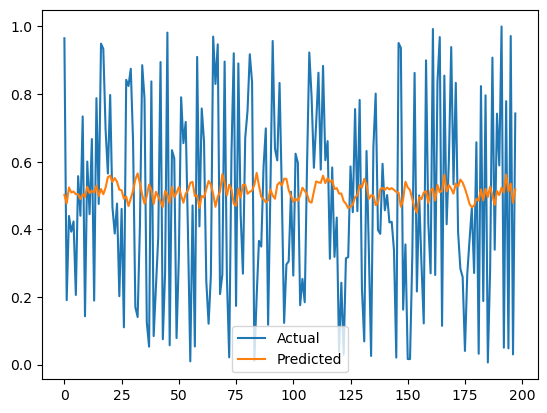

MSE: 0.08617387357608455
MAE: 0.2542604796553353
Naive MSE: 0.18000358659560342


In [6]:
import matplotlib.pyplot as plt
# generar predicciones
y_pred = model.predict(X_test)
# visualizar resultados
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
# calcular métricas de rendimiento
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
print('MSE:', mse)
print('MAE:', mae)
# comparar con el modelo base (pronóstico ingenuo)
y_naive = y_test[:-1]
mse_naive = np.mean((y_test[1:] - y_naive)**2)
print('Naive MSE:', mse_naive)